In [ ]:
import pandas as pd
import string

In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head(5)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [ ]:
len(df.index)

7001

In [ ]:
df =df.drop(['Index', 'Name', 'Area', 'Review_Date',
             'Rating_attribute'], axis = 1)

df.rename(columns={'Rating(Out of 10)': 'Rating'}, inplace=True)
df.to_csv('hotel_reviews_label.csv', index=False)

In [ ]:
df.head(5)

,Rating,Review_Text
0,9.0,Hotel the pearl is perfect place to stay in De...
1,9.0,Location of the hotel is perfect. The hotel is...
2,9.0,"Location, Indian food."
3,9.0,The location and the hotel itself is great. Ne...
4,9.0,Friendly and smiling staffs.. The reception st...


In [ ]:
df = pd.read_csv('hotel_reviews_label.csv')

df = df[df['Review_Text'].str.strip() != 'no comments available for this review']
df = df[df['Review_Text'].str.strip() != 'Nothing']
df = df[df['Review_Text'].str.strip() != 'Nothing.']
df = df[df['Review_Text'].str.strip() != 'nothing']
df = df[df['Review_Text'].str.strip() != 'Location']

df.to_csv('hotel_reviews_label.csv', index=False)

In [ ]:
len(df.index)

6165

**LABELLING DATA**

In [ ]:
df['Review_Text'] = df['Review_Text'].fillna('').astype(str)

def pelabelan(Review):
  positif_keywords = ['excellent', 'good', 'great', 'amazing', 'wonderful', 'lovely',
                      'perfect', 'friendly', 'comfortable']
  negatif_keywords = ['bad', 'poor', 'horrible', 'terrible', 'disappointed', 'dirty',
                      'noisy', 'worst', 'rude', 'awful', 'disgusting', 'disappointing']

  review_lower = Review.lower()
  if any(word in review_lower for word in positif_keywords):
    return '1'
  elif any(word in review_lower for word in negatif_keywords):
    return '-1'
  else:
    return '0'

df['Label'] = df['Review_Text'].apply(pelabelan)
df.to_csv('hotel_reviews_label.csv', index=False)

In [ ]:
df.head(5)

,Rating,Review_Text,Label
0,9.0,Hotel the pearl is perfect place to stay in De...,1
1,9.0,Location of the hotel is perfect. The hotel is...,1
2,9.0,"Location, Indian food.",0
3,9.0,The location and the hotel itself is great. Ne...,1
4,9.0,Friendly and smiling staffs.. The reception st...,1


In [ ]:
df.isnull().sum()

,0
Rating,0
Review_Text,0
Label,0


**PREPROCESSING**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
df = pd.read_csv('hotel_reviews_label.csv', encoding='utf-8')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Huruf besar menjadi huruf kecil
df['Text Preprocessing'] = df['Review_Text'].astype(str).str.lower()

# punctuation
def hapus_tanda(text):
  return re.sub(r'[^\w\s]', '', text)

df = df.applymap(lambda x: hapus_tanda(str(x)) if isinstance(x,str) else x)

# Stopwords
STOPWORDS = set(stopwords.words('english'))

def hapus_stopwords(text):
  return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])
df['Text Preprocessing'] = df['Text Preprocessing'].astype(str).apply(hapus_stopwords)

# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

df['Text Preprocessing'] = df['Text Preprocessing'].astype(str).apply(lemmatize_text)

# Melakukan Tokenisasi
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def tokenize(text):
  return word_tokenize(text)

df['Text Preprocessing'] = df['Text Preprocessing'].astype(str).apply(tokenize)

df.to_csv('Hasil Preprocessing.csv', index=False)

<ipython-input-12-83c1d060b40a>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: hapus_tanda(str(x)) if isinstance(x,str) else x)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df.head(5)

,Rating,Review_Text,Label,Text Preprocessing
0,9.0,Hotel the pearl is perfect place to stay in De...,1,"[hotel, pearl, perfect, place, stay, delhi, pa..."
1,9.0,Location of the hotel is perfect The hotel is ...,1,"[location, hotel, perfect, hotel, peaceful, ni..."
2,9.0,Location Indian food,0,"[location, indian, food]"
3,9.0,The location and the hotel itself is great Nex...,1,"[location, hotel, great, next, time, stay, nic..."
4,9.0,Friendly and smiling staffs The reception staf...,1,"[friendly, smile, staff, reception, staff, exc..."


**VISUALISASI DATA**

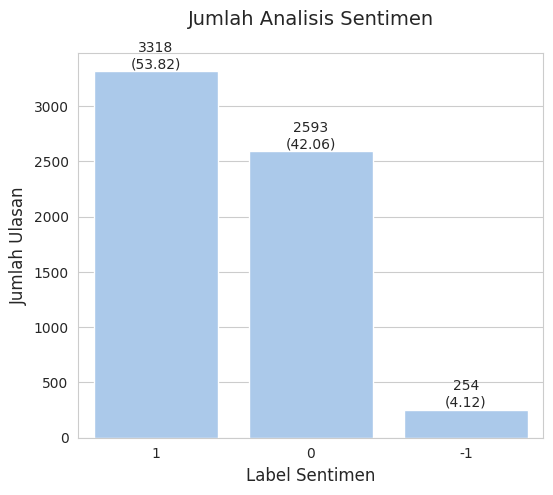

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['Label'].value_counts()
sentiment_order = ['1', '0', '-1']
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(x= sentiment_counts.index, y = sentiment_counts.values, palette='pastel',
                 hue=False, legend=False, order=sentiment_order)

plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

total = len(df['Label'])

for i, count in enumerate(sentiment_counts.values):
  percentage = f'{100 * count / total:.2f}'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('Hasil Preprocessing.csv', encoding='utf-8')

sentimen_positif = df[df['Label'] == 1]['Text Preprocessing'].apply(lambda x: ' '.join(eval(x))).str.cat(sep=' ')
sentimen_netral = df[df['Label'] == 0]['Text Preprocessing'].apply(lambda x: ' '.join(eval(x))).str.cat(sep=' ')
sentimen_negatif = df[df['Label'] == -1]['Text Preprocessing'].apply(lambda x: ' '.join(eval(x))).str.cat(sep=' ')

In [ ]:
def create_wordcloud(text, title):
  wordcloud = WordCloud(width=600, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show

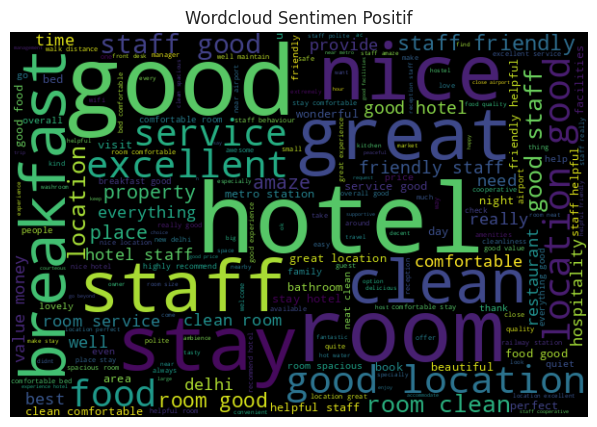

In [ ]:
create_wordcloud(sentimen_positif, 'Wordcloud Sentimen Positif')

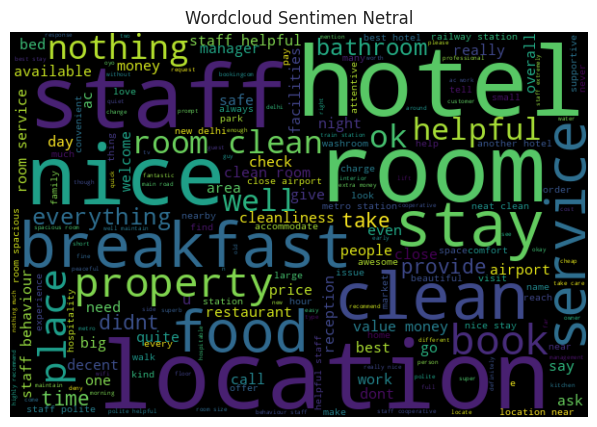

In [ ]:
create_wordcloud(sentimen_netral, 'Wordcloud Sentimen Netral')

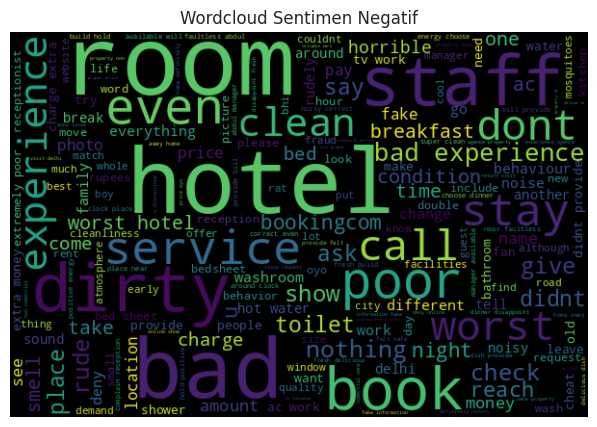

In [ ]:
create_wordcloud(sentimen_negatif, 'Wordcloud Sentimen Negatif')

**SPLITTING DATA**

In [ ]:
x = df.iloc[:,3]
print(x)

print()

y = df.iloc[:,2]
print(y)

0       ['hotel', 'pearl', 'perfect', 'place', 'stay',...
1       ['location', 'hotel', 'perfect', 'hotel', 'pea...
2                          ['location', 'indian', 'food']
3       ['location', 'hotel', 'great', 'next', 'time',...
4       ['friendly', 'smile', 'staff', 'reception', 's...
                              ...                        
6160    ['peaceful', 'place', 'though', 'corner', 'ind...
6161    ['room', 'good', 'comfortable', 'aesthetic', '...
6162                                    ['good', 'hotel']
6163    ['good', 'experience', 'hotel', 'good', 'staff...
6164                                       ['well', 'do']
Name: Text Preprocessing, Length: 6165, dtype: object

0       1
1       1
2       0
3       1
4       1
       ..
6160    0
6161    1
6162    1
6163    1
6164    0
Name: Label, Length: 6165, dtype: int64


In [ ]:
import numpy as np

train = 0.8
test = 1 - train

np.random.seed(42)
indices = np.random.permutation(len(df))

train_size = int(len(df) * train)
train_data = indices[:train_size]
test_data = indices[train_size:]

In [ ]:
x_train = df.iloc[train_data, 3]
y_train = df.iloc[train_data, 2]

x_test = df.iloc[test_data, 3]
y_test = df.iloc[test_data, 2]

In [ ]:
df = pd.read_csv('Hasil Preprocessing.csv')

document_list = df['Text Preprocessing'].astype(str).apply(lambda x: ' '.join(eval(x))).tolist()

def bow_vector(document_list):
    combined_string = ' '.join(document_list)
    word_set = [word for word in set(combined_string.split()) if len(word) > 1]

    filtered_docs = []
    for document in document_list:
      filtered_docs.append(' '.join([word for word in document.split() if len(word) > 1]))

    doc_word_count = []
    for document in filtered_docs:
      doc_word_count.append([document.split().count(word) for word in word_set])

    return {doc: vector for doc, vector in zip(filtered_docs, doc_word_count)}\

def word_list(document_list):
    combined_string = ' '.join(document_list)
    return [word for word in set(combined_string.split()) if len(word) > 1]

bow = bow_vector(document_list)

bow_df = pd.DataFrame(bow.values(), columns=word_list(document_list))
bow_df['Document'] = list(bow.keys())
bow_df.to_csv('Hasil_BoW.csv')

print("Proses BoWs selesai. Hasil disimpan di 'Hasil_BoW.csv")

Proses BoWs selesai. Hasil disimpan di 'Hasil_BoW.csv


In [ ]:
bow_df.head(5)

,combination,suggestions,отличный,fooding,mock,aroundare,tasteful,tack,available,inadeguato,...,surroundings,coustom,spaciously,fact,impeccably,irrespective,emerge,jasmine,mohan,Document
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hotel pearl perfect place stay delhi paharganj...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,location hotel perfect hotel peaceful nice sta...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,location indian food
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,location hotel great next time stay nice room ...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friendly smile staff reception staff excellent...


Menghitung Probabilitas Prior (P(c)P(C))

In [ ]:
df = pd.read_csv('Hasil Preprocessing.csv')

# Menghitung probabilitas prior
sentiment_counts = df['Label'].value_counts()
total_samples = len(df)
prior_probabilities = sentiment_counts / total_samples

print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
Label
 1    0.5382
 0    0.4206
-1    0.0412
Name: count, dtype: float64


Menghitung Probabilitas Kondisional (P(wi|C)P(wi|C))

In [ ]:
df_bow = pd.read_csv('Hasil_BoW.csv')
df_preprocessing = pd.read_csv('Hasil Preprocessing.csv')

df_bow['Label'] = df_preprocessing['Label']

features = df_bow.columns[:-1]

df_positif = df_bow[df_bow['Label'] == '1']
df_netral = df_bow[df_bow['Label'] == '0']
df_negatif = df_bow[df_bow['Label'] == '-1']

frequency_positive = df_positif[features].sum()
frequency_netral = df_netral[features].sum()
frequency_negative = df_negatif[features].sum()

total_positive = frequency_positive.sum()
total_negative = frequency_negative.sum()
total_netral = frequency_netral.sum()

probability_conditional_positive = (frequency_positive + 1) / (total_positive + len(features))
probability_conditional_negative = (frequency_negative + 1) / (total_negative + len(features))
probability_conditional_netral = (frequency_netral + 1) / (total_netral + len(features))

print("Probability Conditional Positif:")
print(probability_conditional_positive)
print("Probability Conditional Negatif:")
print(probability_conditional_negative)
print("Probability Conditional Netral:")
print(probability_conditional_netral)

Probability Conditional Positif:
Unnamed: 0      0.000213
combination     0.000213
suggestions     0.000213
отличный        0.000213
fooding         0.000213
                  ...   
irrespective    0.000213
emerge          0.000213
jasmine         0.000213
mohan           0.000213
Document        0.000213
Length: 4701, dtype: object
Probability Conditional Negatif:
Unnamed: 0      0.000213
combination     0.000213
suggestions     0.000213
отличный        0.000213
fooding         0.000213
                  ...   
irrespective    0.000213
emerge          0.000213
jasmine         0.000213
mohan           0.000213
Document        0.000213
Length: 4701, dtype: object
Probability Conditional Netral:
Unnamed: 0      0.000213
combination     0.000213
suggestions     0.000213
отличный        0.000213
fooding         0.000213
                  ...   
irrespective    0.000213
emerge          0.000213
jasmine         0.000213
mohan           0.000213
Document        0.000213
Length: 4701, dtype: 

Menghitung Probabilitas Prior (P(C|w)P(C|w))

In [ ]:
def calculate_posterior_probabilities(document):
  words = document.split()
  posterior_positive = prior_probabilities.get('1',1)
  posterior_netral = prior_probabilities.get('0',1)
  posterior_negative = prior_probabilities.get('-1',1)

  for word in words:
    # Check if the word is in the index of probability conditional series
    if word in probability_conditional_positive.index:
      posterior_positive *= probability_conditional_positive[word]
    else:
      posterior_positive *= 1 / (total_positive + len(features))

    if word in probability_conditional_negative.index:
      posterior_negative *= probability_conditional_negative[word]
    else:
      posterior_negative *= 1 / (total_negative + len(features))

    if word in probability_conditional_netral.index:
      posterior_netral *= probability_conditional_netral[word]
    else:
      posterior_netral *= 1 / (total_netral + len(features))

  return {'1' : posterior_positive, '-1' : posterior_negative, '0' : posterior_netral}

df['posterior_probabilities'] = df['Text Preprocessing'].apply(calculate_posterior_probabilities)

df.head(5)

,Rating,Review_Text,Label,Text Preprocessing,posterior_probabilities
0,9.0,Hotel the pearl is perfect place to stay in De...,1,"['hotel', 'pearl', 'perfect', 'place', 'stay',...","{'1': 7.656049365114407e-78, '-1': 7.656049365..."
1,9.0,Location of the hotel is perfect The hotel is ...,1,"['location', 'hotel', 'perfect', 'hotel', 'pea...","{'1': 8.584539153198515e-45, '-1': 8.584539153..."
2,9.0,Location Indian food,0,"['location', 'indian', 'food']","{'1': 9.625631831554551e-12, '-1': 9.625631831..."
3,9.0,The location and the hotel itself is great Nex...,1,"['location', 'hotel', 'great', 'next', 'time',...","{'1': 3.739088373130746e-63, '-1': 3.739088373..."
4,9.0,Friendly and smiling staffs The reception staf...,1,"['friendly', 'smile', 'staff', 'reception', 's...","{'1': 1.7577454442087636e-59, '-1': 1.75774544..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6165 entries, 0 to 6164
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   6165 non-null   float64
 1   Review_Text              6154 non-null   object 
 2   Label                    6165 non-null   int64  
 3   Text Preprocessing       6165 non-null   object 
 4   posterior_probabilities  6165 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 240.9+ KB


Evaluasi Model dengan Naive Bayes Multinomial

In [ ]:
def classify_document(doc):
  posterior = calculate_posterior_probabilities(' '.join(eval(doc)))
  return max(posterior, key=posterior.get)

y_pred_mnb = x_test.apply(classify_document)

conf_matrix = {
    '1': {'1': 0, '0': 0, '-1': 0},
    '0': {'1': 0, '0': 0, '-1': 0},
    '-1': {'1': 0, '0': 0, '-1': 0},
}

for true_label, predicted_label in zip(y_test, y_pred_mnb):
  true_label = str(true_label)
  predicted_label = str(predicted_label)

  if true_label not in conf_matrix:
    conf_matrix[true_label] = {'1': 0, '0': 0, '-1': 0}

  if predicted_label not in conf_matrix[true_label]:
    conf_matrix[true_label][predicted_label] = 0

  conf_matrix[true_label][predicted_label] += 1

correct_predictions = sum(conf_matrix[label][label] for label in conf_matrix)
total_predictions = sum(sum(row.values()) for row in conf_matrix.values())
accuracy_mnb = correct_predictions / total_predictions

def precision_recall_fl(conf_matrix, label):
    tp = conf_matrix[label][label]
    fp = sum(conf_matrix[other_label][label] for other_label in conf_matrix if other_label != label)
    fn = sum(conf_matrix[label][other_label] for other_label in conf_matrix if other_label != label)
    tn = sum(conf_matrix[other_label][other_label] for other_label in conf_matrix if other_label != label)

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1

precision_pos, recall_pos, f1_pos = precision_recall_fl(conf_matrix, '1')
precision_netral, recall_netral, f1_netral = precision_recall_fl(conf_matrix, '0')
precision_neg, recall_neg, f1_neg = precision_recall_fl(conf_matrix, '-1')

print("Evaluation of Multinomial Naive Bayes Results")
print("---------------------------------------------------")
print(f"Confusion Matrix :\n{conf_matrix}")
print(f"\nAccuracy: {accuracy_mnb:.4f}")
print(f"Precision (Positif): {precision_pos:.4f}, Recall (Positif): {recall_pos:.4f}, F1 (Positif): {f1_pos:.4f}")
print(f"Precision (Netral): {precision_netral:.4f}, Recall (Netral): {recall_netral:.4f}, F1 (Netral): {f1_netral:.4f}")
print(f"Precision (Negatif): {precision_neg:.4f}, Recall (Negatif): {recall_neg:.4f}, F1 (Negatif): {f1_neg:.4f}")

Evaluation of Multinomial Naive Bayes Results
---------------------------------------------------
Confusion Matrix :
{'1': {'1': 681, '0': 0, '-1': 0}, '0': {'1': 506, '0': 0, '-1': 0}, '-1': {'1': 46, '0': 0, '-1': 0}}

Accuracy: 0.5523
Precision (Positif): 0.5523, Recall (Positif): 1.0000, F1 (Positif): 0.7116
Precision (Netral): 0.0000, Recall (Netral): 0.0000, F1 (Netral): 0.0000
Precision (Negatif): 0.0000, Recall (Negatif): 0.0000, F1 (Negatif): 0.0000


In [ ]:
# Definisikan kata kunci awal untuk sentimen positif dan negatif
positif_keywords = ['excellent', 'good', 'great', 'amazing', 'wonderful', 'lovely', 'perfect', 'friendly', 'comfortable']
negatif_keywords = ['bad', 'poor', 'horrible', 'terrible', 'disappointed', 'dirty', 'noisy', 'worst', 'rude', 'awful', 'disgusting', 'disappointing']

# Tambahkan kata kunci tambahan
positif_keywords += ['fantastic', 'awesome', 'enjoyed', 'pleased', 'satisfied']
negatif_keywords += ['disgusted', 'unpleasant', 'awful', 'pathetic', 'boring']


In [ ]:
# Impor stopwords dari nltk
import nltk
from nltk.corpus import stopwords

# Unduh daftar stopwords jika belum
nltk.download('stopwords')

# Definisikan STOPWORDS
STOPWORDS = set(stopwords.words('english'))

# Simpan beberapa stopwords penting
important_stopwords = {'not', 'no', 'but'}

# Buat daftar stopwords yang sudah difilter
filtered_stopwords = STOPWORDS - important_stopwords

# Fungsi untuk menghapus stopwords yang sudah direvisi
def hapus_stopwords_revised(text):
    return " ".join([word for word in text.split() if word.lower() not in filtered_stopwords])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))  # Inisialisasi STOPWORDS
from nltk.tokenize import word_tokenize
features = {'word1', 'word2', 'word3'}  # Contoh: Semua kata unik dalam dataset

In [ ]:
# --- Perbaikan Pelabelan ---
positif_keywords += ['fantastic', 'awesome', 'enjoyed', 'pleased', 'satisfied']
negatif_keywords += ['disgusted', 'unpleasant', 'awful', 'pathetic', 'boring']

# --- Preprocessing Revisi ---
# Simpan beberapa stopwords penting
important_stopwords = {'not', 'no', 'but'}
filtered_stopwords = set(STOPWORDS) - important_stopwords

def hapus_stopwords_revised(text):
    return " ".join([word for word in str(text).split() if word.lower() not in filtered_stopwords])

df['Text Preprocessing'] = df['Text Preprocessing'].astype(str).apply(hapus_stopwords_revised)

# --- Laplace Smoothing ---
laplace_smoothing = 1.5

probability_conditional_positive = (frequency_positive + laplace_smoothing) / (total_positive + laplace_smoothing * len(features))
probability_conditional_negative = (frequency_negative + laplace_smoothing) / (total_negative + laplace_smoothing * len(features))
probability_conditional_netral = (frequency_netral + laplace_smoothing) / (total_netral + laplace_smoothing * len(features))

# --- Tokenization dan Validasi ---
def tokenize_and_validate(text):
    tokens = word_tokenize(text)
    return [token for token in tokens if token in features]

df['Validated Tokens'] = df['Text Preprocessing'].apply(lambda x: tokenize_and_validate(' '.join(eval(x))))

# --- Re-run Model ---
y_pred_mnb_revised = x_test.apply(classify_document)

# Hitung kembali akurasi
conf_matrix_revised = {label: {inner_label: 0 for inner_label in sentiment_order} for label in sentiment_order}

for true_label, predicted_label in zip(y_test, y_pred_mnb_revised):
    conf_matrix_revised[true_label][predicted_label] += 1

correct_predictions_revised = sum(conf_matrix_revised[label][label] for label in conf_matrix_revised)
total_predictions_revised = sum(sum(row.values()) for row in conf_matrix_revised.values())
accuracy_mnb_revised = correct_predictions_revised / total_predictions_revised

# Cetak hasil revisi
print(f"\nRevised Accuracy: {accuracy_mnb_revised:.4f}")


KeyError: 1